In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("listings.csv")

In [28]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [29]:
df.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7905,7.907000e+03,7907,7907,7907,7907.000000,7907.000000,7907,7907.000000,7907.000000,7907.000000,5149,5149.000000,7907.000000,7907.000000
unique,NaN,7457,NaN,1833,5,43,NaN,NaN,3,NaN,NaN,NaN,1001,NaN,NaN,NaN
top,NaN,Luxury hostel with in-cabin locker - Single mixed,NaN,Jay,Central Region,Kallang,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-08-12,NaN,NaN,NaN
freq,NaN,13,NaN,290,6309,1043,NaN,NaN,4132,NaN,NaN,NaN,152,NaN,NaN,NaN
mean,2.338862e+07,NaN,9.114481e+07,NaN,NaN,NaN,1.314192,103.848787,NaN,169.332996,17.510054,12.807386,NaN,1.043669,40.607689,208.726318
std,1.016416e+07,NaN,8.190910e+07,NaN,NaN,NaN,0.030577,0.043675,NaN,340.187599,42.094616,29.707746,NaN,1.285851,65.135253,146.120034
min,4.909100e+04,NaN,2.366600e+04,NaN,NaN,NaN,1.243870,103.646560,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,1.582180e+07,NaN,2.305808e+07,NaN,NaN,NaN,1.295795,103.835825,NaN,65.000000,1.000000,0.000000,NaN,0.180000,2.000000,54.000000
50%,2.470627e+07,NaN,6.344891e+07,NaN,NaN,NaN,1.311030,103.849410,NaN,124.000000,3.000000,2.000000,NaN,0.550000,9.000000,260.000000
75%,3.234850e+07,NaN,1.553811e+08,NaN,NaN,NaN,1.322110,103.872535,NaN,199.000000,10.000000,10.000000,NaN,1.370000,48.000000,355.000000


In [27]:
df.isna().mean().sort_values(ascending=False)

name                              0.000253
id                                0.000000
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.000000
reviews_per_month                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [31]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [32]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(7907, 16)

price, id, neighbourhood, review_scores_rating, availability_365, host_id, host_name are important business columns

In [24]:
df["last_review"] = df["last_review"].fillna("Never")
df["reviews_per_month"] = df["reviews_per_month"].fillna(0.0) 

In [25]:
df["last_review"].isna().mean()

np.float64(0.0)

In [31]:
df["name"] = df["name"].fillna("Unnamed Listing")

In [32]:
df.isna().mean()

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [3]:
df["price_per_min_stay"] = df["price"] * df["minimum_nights"]

In [5]:
df["price_per_min_stay"]

0       14940
1        7290
2         414
3         206
4          94
        ...  
7902      300
7903     3300
7904     1740
7905      784
7906     5850
Name: price_per_min_stay, Length: 7907, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

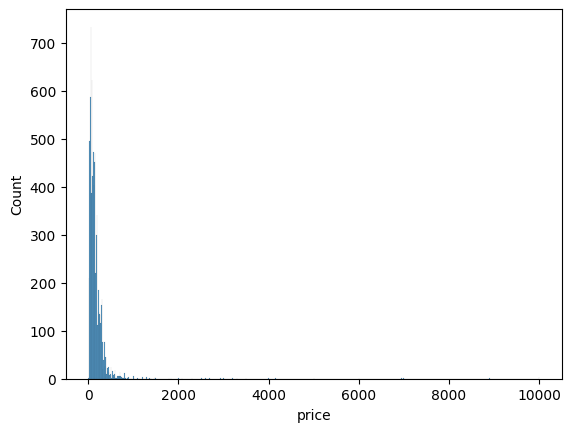

In [13]:
sns.histplot(x=df["price"])

In [9]:
print(df["price"].max())

10000


<Axes: xlabel='room_type', ylabel='price'>

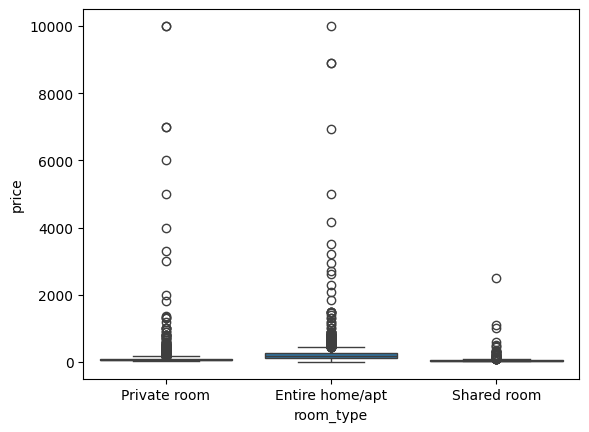

In [11]:
sns.boxplot(data=df, x="room_type", y="price")

<Axes: xlabel='neighbourhood_group', ylabel='id'>

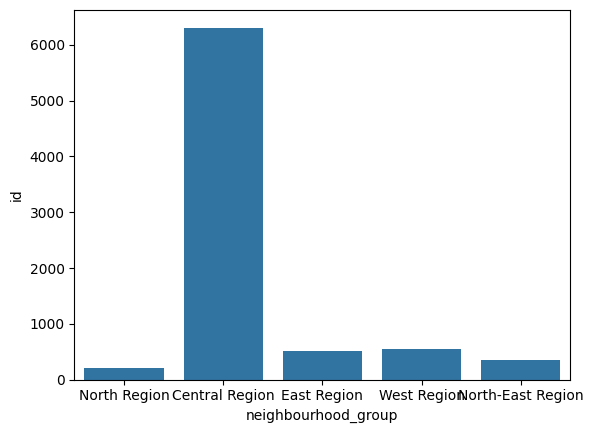

In [16]:
sns.barplot(x="neighbourhood_group", y="id", data=df, estimator=len)